# Data and Methods:

The data that will be used in this project is the locations of bubble tea stores in Boston and Los Angeles. The approach to this problem is to find the three most centralized locations of the bubble tea stores in both cities and to find the distance between the two furthest sugar hubs. Through this data and this approach, the company can determine the best locations to set up its sugar hubs.

### Import Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

### Credentials

In [2]:
# The code was removed by Watson Studio for sharing.

### Location (Los Angeles)

Upon inspection on Google Maps, a majority of the boba places located in Los Angeles are nearby Central Los Angeles. We will use Greater Wilshire / Hancock Park as our approximate location for Central Los Angeles. To get a definite address that Foursquare can use, we will use Wilshire Country Club.

In [3]:
address = '301 N Rossmore Ave, Los Angeles, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

34.07619 -118.327228


For our radius, we will use an approximation of 10 miles (~16 km) with the central point as Wilshire Country Club. Additionally, for our search results, we will use the search term "Boba" and not use other terms such as "Bubble Tea" for simplicity. Additionally, we will set the limit to 100 to ensure that as many boba locations are picked up in the search. 

In [4]:
search_query = 'Boba'
radius = 16000
LIMIT = 100
print(search_query + ' .... OK!')

Boba .... OK!


##### Corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=YGZSPFIITJOFFRNCHUY3BXG0S3BXRYJXZT3DO3YKCRHEKDY3&client_secret=VXF2SXQ4XCQSEJHYPD4CROWINUDNOPEENH4RNG0F05LGJ23R&ll=34.07619,-118.327228&v=20190922&query=Boba&radius=16000&limit=100'

##### Get Request

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d8853f15d891b0039a1e783'},
 'response': {'venues': [{'id': '565234e438fa31e5cb3a269a',
    'name': 'mr. boba',
    'location': {'address': '3805 W 6th St',
     'lat': 34.06383973736686,
     'lng': -118.30569178473783,
     'labeledLatLngs': [{'label': 'display',
       'lat': 34.06383973736686,
       'lng': -118.30569178473783}],
     'distance': 2415,
     'postalCode': '90020',
     'cc': 'US',
     'city': 'Los Angeles',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['3805 W 6th St',
      'Los Angeles, CA 90020',
      'United States']},
    'categories': [{'id': '52e81612bcbc57f1066b7a0c',
      'name': 'Bubble Tea Shop',
      'pluralName': 'Bubble Tea Shops',
      'shortName': 'Bubble Tea',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bubble_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '494047',
     'url': 'https://www.grubhub.com/restaurant/mr-boba

##### Convert results to Pandas DataFrame

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",494047,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/mr-boba-380...,False,565234e438fa31e5cb3a269a,3805 W 6th St,...,2415,"[3805 W 6th St, Los Angeles, CA 90020, United ...","[{'label': 'display', 'lat': 34.06383973736686...",34.063840,-118.305692,NaN,90020,CA,mr. boba,v-1569215473
1,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",561726,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/its-boba-ti...,False,4f9b2e43e4b0609167ef7eee,3450 S 6th St,...,3121,"[3450 S 6th St (at Kenmore Ave), Los Angeles, ...","[{'label': 'display', 'lat': 34.06347592282087...",34.063476,-118.297057,NaN,90020,CA,It's Boba Time,v-1569215473
2,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",1071499,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/mr-boba-700...,False,5456ccdf498ea8054fabf3fb,700 S Western Ave #102,...,2519,"[700 S Western Ave #102, Los Angeles, CA 90005...","[{'label': 'display', 'lat': 34.05957637038746...",34.059576,-118.308672,NaN,90005,CA,Mr BOBA,v-1569215473
3,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,5ae11ffff62e09002c870654,8820 Washington Blvd #107,...,7777,"[8820 Washington Blvd #107, Culver City, CA 90...","[{'label': 'display', 'lat': 34.02723197680844...",34.027232,-118.387386,NaN,90232,CA,Boba Guys,v-1569215473
4,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",1148828,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/its-bobatim...,False,4b81e89cf964a52092c330e3,125 N Western Ave,...,1664,"[125 N Western Ave, Los Angeles, CA 90004, Uni...","[{'label': 'display', 'lat': 34.07388500074416...",34.073885,-118.309390,NaN,90004,CA,Boba Time,v-1569215473


We will include boba locations in adjacent cities such as Burbank and Culver City due to the shape of the Los Angeles region. If sugar hubs were to be built, it will be more optimal to include boba locations in adjacent cities and not entirely restrict to just the Los Angeles region.

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories', 'city'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,categories,city,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,mr. boba,Bubble Tea Shop,NaN,3805 W 6th St,US,Los Angeles,United States,NaN,2415,"[3805 W 6th St, Los Angeles, CA 90020, United ...","[{'label': 'display', 'lat': 34.06383973736686...",34.063840,-118.305692,NaN,90020,CA,565234e438fa31e5cb3a269a
1,It's Boba Time,Bubble Tea Shop,NaN,3450 S 6th St,US,Los Angeles,United States,at Kenmore Ave,3121,"[3450 S 6th St (at Kenmore Ave), Los Angeles, ...","[{'label': 'display', 'lat': 34.06347592282087...",34.063476,-118.297057,NaN,90020,CA,4f9b2e43e4b0609167ef7eee
2,Mr BOBA,Café,NaN,700 S Western Ave #102,US,Los Angeles,United States,NaN,2519,"[700 S Western Ave #102, Los Angeles, CA 90005...","[{'label': 'display', 'lat': 34.05957637038746...",34.059576,-118.308672,NaN,90005,CA,5456ccdf498ea8054fabf3fb
3,Boba Guys,Bubble Tea Shop,NaN,8820 Washington Blvd #107,US,Culver City,United States,NaN,7777,"[8820 Washington Blvd #107, Culver City, CA 90...","[{'label': 'display', 'lat': 34.02723197680844...",34.027232,-118.387386,NaN,90232,CA,5ae11ffff62e09002c870654
4,Boba Time,Juice Bar,NaN,125 N Western Ave,US,Los Angeles,United States,NaN,1664,"[125 N Western Ave, Los Angeles, CA 90004, Uni...","[{'label': 'display', 'lat': 34.07388500074416...",34.073885,-118.309390,NaN,90004,CA,4b81e89cf964a52092c330e3
5,It's Boba Time,Bubble Tea Shop,NaN,621 S Western Ave,US,Los Angeles,United States,NaN,2233,"[621 S Western Ave, Los Angeles, CA 90005, Uni...","[{'label': 'display', 'lat': 34.06283541393707...",34.062835,-118.309145,NaN,90005,CA,51621bde498efb317e25d580
6,Boba Bear,Dessert Shop,NaN,414 S Western Ave #C,US,Los Angeles,United States,at 4th St,1992,"[414 S Western Ave #C (at 4th St), Los Angeles...","[{'label': 'display', 'lat': 34.06681573337585...",34.066816,-118.308817,NaN,90020,CA,4cae4ebfbabebfb75130a1ab
7,Boba Loca,Tea Room,NaN,148 N San Fernando Blvd,US,Burbank,United States,Orange Grove,11843,"[148 N San Fernando Blvd (Orange Grove), Burba...","[{'label': 'display', 'lat': 34.18157409896321...",34.181574,-118.309592,NaN,91502,CA,4b5bbf05f964a520d01329e3
8,Back Door Boba,Asian Restaurant,NaN,5484 Wilshire Blvd,US,Los Angeles,United States,NaN,2515,"[5484 Wilshire Blvd, Los Angeles, CA 90036, Un...","[{'label': 'display', 'lat': 34.061862, 'lng':...",34.061862,-118.348324,NaN,90036,CA,4e90dac6f5b9f8967cdf3535
9,It's Boba Time,Bubble Tea Shop,NaN,2255 Colorado Blvd,US,Los Angeles,United States,NaN,12481,"[2255 Colorado Blvd, Los Angeles, CA 90041, Un...","[{'label': 'display', 'lat': 34.13950410896339...",34.139504,-118.215463,NaN,90041,CA,542eee9d498e0f6206a6beb0


In [9]:
dataframe_filtered.name

0                                mr. boba
1                          It's Boba Time
2                                 Mr BOBA
3                               Boba Guys
4                               Boba Time
5                          It's Boba Time
6                               Boba Bear
7                               Boba Loca
8                          Back Door Boba
9                          It's Boba Time
10                              Boba Time
11                            Boba Studio
12                               BobaTime
13                            Partea Boba
14                             boba story
15                         It's Boba Time
16                         It's Boba Time
17                            I Love Boba
18                              Boba Loca
19                            Boba Square
20                The Boba Promenade Cafe
21                              Boba Guys
22                   I Love Boba Number 5
23                     Boba Coffee

##### Display Map

In [10]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add a red circle marker to represent the Wilshire Country Club
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Wilshire Country Club',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Boba venues as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Location (Boston)

Upon inspection on Google Maps, a majority of the boba places located in Boston are in the northernmost part. We will use Fenway Park as our approximate central location of the northernmost part of Boston. We will also use Fenway Park as a definite adderess that Foursquare can use. 

In [11]:
address1 = '4 Jersey St, Boston, MA'

geolocator1 = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print(latitude1, longitude1)

42.34648975 -71.0972244184537


For our radius, we will use an approximation of 10 miles (~16 km) with the central point as Fenway Park. Additionally, for our search results, we will use the search term "Boba" and not use other terms such as "Bubble Tea" for simplicity. Additionally, we will set the limit to 100 to ensure that as many boba locations are picked up in the search. 

In [12]:
search_query = 'Boba'
radius1 = 16000
LIMIT = 100
print(search_query + ' .... OK!')

Boba .... OK!


##### Corresponding URL

In [13]:
url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude1, longitude1, VERSION, search_query, radius1, LIMIT)
url1

'https://api.foursquare.com/v2/venues/search?client_id=YGZSPFIITJOFFRNCHUY3BXG0S3BXRYJXZT3DO3YKCRHEKDY3&client_secret=VXF2SXQ4XCQSEJHYPD4CROWINUDNOPEENH4RNG0F05LGJ23R&ll=42.34648975,-71.0972244184537&v=20190922&query=Boba&radius=16000&limit=100'

##### Get Request

In [14]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '5d88540e2b274a003815ac8c'},
 'response': {'venues': [{'id': '5d54630266378f0008aed162',
    'name': 'Boba Me',
    'location': {'address': '1520 Tremont St',
     'lat': 42.332286,
     'lng': -71.099674,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.332286,
       'lng': -71.099674}],
     'distance': 1593,
     'postalCode': '02120',
     'cc': 'US',
     'city': 'Boston',
     'state': 'MA',
     'country': 'United States',
     'formattedAddress': ['1520 Tremont St',
      'Boston, MA 02120',
      'United States']},
    'categories': [{'id': '52e81612bcbc57f1066b7a0c',
      'name': 'Bubble Tea Shop',
      'pluralName': 'Bubble Tea Shops',
      'shortName': 'Bubble Tea',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bubble_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1569215502',
    'hasPerk': False},
   {'id': '5cb75c3a35d3fc00397589bd',
    'name': 'Sweet Waffles + Boba'

##### Convert results to Pandas DataFrame

In [15]:
# assign relevant part of JSON to venues
venues1 = results1['response']['venues']

# tranform venues into a dataframe
dataframe1 = json_normalize(venues1)
dataframe1.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",False,5d54630266378f0008aed162,1520 Tremont St,US,Boston,United States,1593,"[1520 Tremont St, Boston, MA 02120, United Sta...","[{'label': 'display', 'lat': 42.332286, 'lng':...",42.332286,-71.099674,02120,MA,Boba Me,v-1569215502
1,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",False,5cb75c3a35d3fc00397589bd,NaN,US,Boston,United States,3090,"[Boston, MA 02111, United States]","[{'label': 'display', 'lat': 42.35054, 'lng': ...",42.350540,-71.060059,02111,MA,Sweet Waffles + Boba,v-1569215502
2,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",False,4f9204abe4b02c276eb53105,NaN,US,Cambridge,United States,3440,"[Cambridge, MA 02138, United States]","[{'label': 'display', 'lat': 42.37212995234278...",42.372130,-71.120583,02138,MA,Boba,v-1569215502
3,"[{'id': '4bf58dd8d48988d1d4941735', 'name': 'S...",False,4e7e73d193ad635c7d2efaef,NaN,US,Boston,United States,1638,"[Boston, MA, United States]","[{'label': 'display', 'lat': 42.339113, 'lng':...",42.339113,-71.079996,NaN,MA,Bob & Co.,v-1569215502
4,"[{'id': '52e81612bcbc57f1066b7a0c', 'name': 'B...",False,5cdc5b9defa82a002c71b902,196 Shirley Ave,US,Revere,United States,10908,"[196 Shirley Ave, Revere, MA 02151, United Sta...","[{'label': 'display', 'lat': 42.407616, 'lng':...",42.407616,-70.993547,02151,MA,4 Seasons Boba Tea,v-1569215502


In [16]:
dataframe1.name

0                   Boba Me
1      Sweet Waffles + Boba
2                      Boba
3                 Bob & Co.
4        4 Seasons Boba Tea
5    Mimi's Boba and Crepes
6            Bob & Claires!
Name: name, dtype: object

Like with Los Angeles, we will include adjacent cities to Boston such as Cambridge or Revere.

In [17]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns1 = ['name', 'categories'] + [col for col in dataframe1.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe1.loc[:, filtered_columns1]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Boba Me,Bubble Tea Shop,1520 Tremont St,US,Boston,United States,1593,"[1520 Tremont St, Boston, MA 02120, United Sta...","[{'label': 'display', 'lat': 42.332286, 'lng':...",42.332286,-71.099674,02120,MA,5d54630266378f0008aed162
1,Sweet Waffles + Boba,Bubble Tea Shop,NaN,US,Boston,United States,3090,"[Boston, MA 02111, United States]","[{'label': 'display', 'lat': 42.35054, 'lng': ...",42.350540,-71.060059,02111,MA,5cb75c3a35d3fc00397589bd
2,Boba,Tea Room,NaN,US,Cambridge,United States,3440,"[Cambridge, MA 02138, United States]","[{'label': 'display', 'lat': 42.37212995234278...",42.372130,-71.120583,02138,MA,4f9204abe4b02c276eb53105
3,Bob & Co.,Speakeasy,NaN,US,Boston,United States,1638,"[Boston, MA, United States]","[{'label': 'display', 'lat': 42.339113, 'lng':...",42.339113,-71.079996,NaN,MA,4e7e73d193ad635c7d2efaef
4,4 Seasons Boba Tea,Bubble Tea Shop,196 Shirley Ave,US,Revere,United States,10908,"[196 Shirley Ave, Revere, MA 02151, United Sta...","[{'label': 'display', 'lat': 42.407616, 'lng':...",42.407616,-70.993547,02151,MA,5cdc5b9defa82a002c71b902
5,Mimi's Boba and Crepes,Creperie,219 Quincy Ave,US,Quincy,United States,14625,"[219 Quincy Ave, Quincy, MA 02169, United States]","[{'label': 'display', 'lat': 42.241256, 'lng':...",42.241256,-70.990873,02169,MA,4f32b1dd19836c91c7f0a0b3
6,Bob & Claires!,None,9 Clifton St,US,Quincy,United States,12480,"[9 Clifton St, Quincy, MA 02169, United States]","[{'label': 'display', 'lat': 42.258277, 'lng':...",42.258277,-71.003668,02169,MA,4d06710f26adb1f793cfdc70


In [18]:
dataframe_filtered1.name

0                   Boba Me
1      Sweet Waffles + Boba
2                      Boba
3                 Bob & Co.
4        4 Seasons Boba Tea
5    Mimi's Boba and Crepes
6            Bob & Claires!
Name: name, dtype: object

##### Display Map

In [20]:
venues_map1 = folium.Map(location=[latitude1, longitude1], zoom_start=13)

# add a red circle marker to represent Fenway Park
folium.features.CircleMarker(
    [latitude1, longitude1],
    radius=10,
    color='red',
    popup='Fenway Park',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)

# add the Boba venues as blue circle markers
for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

# display map
venues_map1

It appears that the Foursquare data does not include every single boba venue. To fix this issue, data from other Boba venues will be added manually using the same search criteria (search_query and radius). Searches will be conducted on Foursquare.

# Finding the locations of the 3 sugar hubs (Los Angeles)

### Retrieve only location data

In [21]:
df_LAloc = dataframe_filtered[['name', 'lat', 'lng']]
df_LAloc.head()

,name,lat,lng
0,mr. boba,34.063840,-118.305692
1,It's Boba Time,34.063476,-118.297057
2,Mr BOBA,34.059576,-118.308672
3,Boba Guys,34.027232,-118.387386
4,Boba Time,34.073885,-118.309390


### Cluster Data

In [22]:
# Import libraries
from pandas import DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df_LAloccluster = DataFrame(df_LAloc, columns = ['lat', 'lng'])
kmeans = KMeans(n_clusters = 3).fit(df_LAloccluster)
centroids = kmeans.cluster_centers_
print(centroids)

# Generate 3 random centroids
plt.scatter(df_LAloccluster['lat'], df_LAloccluster['lng'], c = kmeans.labels_.astype(float), s= 50, alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'red', s = 50)
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

[[  34.18873287 -118.39557124]
 [  34.06471769 -118.29268809]
 [  34.03189301 -118.4244307 ]]


Text(0, 0.5, 'Longitude')

In [23]:
# Iterate KMeans for better centroids
k_means = KMeans(init="k-means++", n_clusters = 3, n_init = 12)
k_means.fit(df_LAloccluster)
k_menas_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

# Display Latitudes and Longitudes of the three central locations
k_means_cluster_centers

array([[  34.06471769, -118.29268809],
       [  34.03189301, -118.4244307 ],
       [  34.18873287, -118.39557124]])

Text(0, 0.5, 'Longitude')

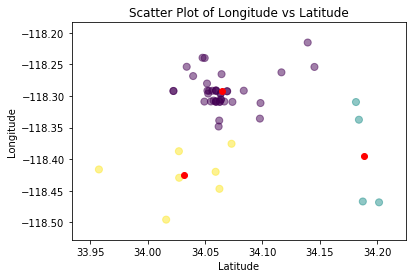

In [23]:
# Plot with new centroids
plt.scatter(df_LAloccluster['lat'], df_LAloccluster['lng'], c = kmeans.labels_.astype(float), s= 50, alpha = 0.5)
plt.scatter(k_means_cluster_centers[0,0],k_means_cluster_centers[0,1], c = 'red')
plt.scatter(k_means_cluster_centers[1,0],k_means_cluster_centers[1,1], c = 'red')
plt.scatter(k_means_cluster_centers[2,0],k_means_cluster_centers[2,1], c = 'red')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [52]:
# Mapping using Folium (Note: only 3 centroids mapped because mapping every location makes it difficult to read)
# Possible location of sugar hubs
coordinates = pd.DataFrame({'Latitude':[k_means_cluster_centers[0,0],k_means_cluster_centers[1,0], k_means_cluster_centers[2,0]], 
                            'Longitude':[k_means_cluster_centers[0,1],k_means_cluster_centers[1,1], k_means_cluster_centers[2,1]],
                            'Name':['Sugar Hub 1', 'Sugar Hub 2', 'Sugar Hub 3']})
coordinates

# Create empty map
m = folium.Map(location=[34.08, -118.3], zoom_start=10)
 
# Add map markers
folium.Marker([k_means_cluster_centers[0,0], k_means_cluster_centers[0,1]], popup = 'Sugar Hub LA 1').add_to(m)
folium.Marker([k_means_cluster_centers[1,0], k_means_cluster_centers[1,1]], popup = 'Sugar Hub LA 2').add_to(m)
folium.Marker([k_means_cluster_centers[2,0], k_means_cluster_centers[2,1]], popup = 'Sugar Hub LA 3').add_to(m)
m

# Finding the locations of the 3 sugar hubs (Boston)

### Retrieve only location data

Note: As mentioned above, not all boba venues are included. Thus, additional location data will be added manually using the same search criteria.

Here is the search url used: https://foursquare.com/explore?mode=url&ne=42.386064%2C-71.032534&q=Boba&sw=42.303976%2C-71.162825

Locations that are obviously not boba venues (such as a metro station) are excluded.

In [25]:
df_Bostonloc = dataframe_filtered1[['name', 'lat', 'lng']]
df_Bostonloc

,name,lat,lng
0,Boba Me,42.332286,-71.099674
1,Sweet Waffles + Boba,42.350540,-71.060059
2,Boba,42.372130,-71.120583
3,Bob & Co.,42.339113,-71.079996
4,4 Seasons Boba Tea,42.407616,-70.993547
5,Mimi's Boba and Crepes,42.241256,-70.990873
6,Bob & Claires!,42.258277,-71.003668


Notes on manually inputted data:

-Super 88 Market Food Connection and Super 88 Market are considered the same location

-Tea Station is not considered since it is a mobile venue

-Gong Cha with locations not listed are not included

-MBTA Chinatown Station not included because it is a metro

-TBaar with locations not listed are not included

-Boba Me already accounted in above dataframe

In [26]:
# Locations 0-10
df_Bostonloc1 = pd.DataFrame({
    'name':['New Dong Khanh Restaurant', 'Boston Tea Shop', 'Kung Fu Tea', 'Tea Do Contemporary Tea House', 'My Thai Vegan Cafe','Kung Fu Tea', 'Super 88 Market Food Connection', 'New Saigon Sandwich', 'Dado Tea', 'Chatime', 'Trident Booksellers and Cafe'], 
    'lat':[42.35092, 42.371750, 42.352270, 42.351050, 42.351460, 42.342620, 42.352420, 42.351130, 42.386330, 42.340890, 42.348250], 
    'lng':[-71.061590, -71.120460, -71.132080, -71.060450, -71.062540, -71.084170, -71.125330, -71.062800, -71.119180, -71.088480, -71.086600]})
df_Bostonloc1

# Locations 11-21
df_Bostonloc2 = pd.DataFrame({
    'name':['Limoo Tea Bar', '163 Vietnamese Sandwiches and Bubble Tea', 'Kung Fu Tea', 'Abide', 'Dolphin Bay', 'Taiwan Cafe', 'Lime Red Tea House', 'Paris Baguette', "Cuong's Vegan", 'Great Taste Bakery and Restaurant', 'Kung Fu Tea'],
    'lat':[42.351490, 42.351290, 42.350550, 42.362540, 42.352410, 42.351479, 42.351730, 42.365480, 42.351460, 42.351300, 42.336640],
    'lng':[-71.122230, -71.061050, -71.060600, -71.098450, -71.128820, -71.060211, -71.124260, -71.102120, -71.062540, -71.061640, -71.149030]
})
df_Bostonloc2

# Locations 22-32
df_Bostonloc3 = pd.DataFrame({    
    'name':['Tealosophy', 'Pho Basil', 'Dumpling Cafe', 'Avana Sushi', 'Blue Asia Cafe', 'Gong Cha', 'Concord Avenue Cafe', 'Japonaise Bakery and Cafe', 'Chatime', 'Hulun Beir', "Pho'n Rice", 'Dumpling Palace'],
    'lat':[42.353780, 42.345790, 42.287270, 42.351610, 42.353050, 42.351610, 42.383650, 42.346200, 42.351730, 42.360850, 42.383630, 42.345700],
    'lng':[-71.137460, -71.087340, -71.071470, -71.060950, -71.130810, -71.060950, -71.134040, -71.107910, -71.061420, -71.069320, -71.112710, -71.087340]
})
df_Bostonloc3

# Locations 33-43
df_Bostonloc4 = pd.DataFrame({
    'name':['Dumpling Palace', 'DAVIDsTea', 'Love Art Sushi', 'Q Restaurant', 'Gong Cha', 'Teriyaki House', 'Quincy Market', 'Dado Tea', 'Dok Bua Thai Kitchen', 'Royaltea', 'Noodle Street'],
    'lat':[42.345700, 42.372820, 42.372820, 42.351961, 42.367032, 42.346893, 42.346895, 42.374218, 42.346893, 42.350687, 42.349165],
    'lng':[-71.087340, -71.120180, -71.120180, -71.062551, -71.076663, -71.088921, -71.088918, -71.120629, -71.088921, -71.060846, -71.092952],
})
df_Bostonloc4

# Locations 44-54
df_Bostonloc5 = pd.DataFrame({
    'name':['Chatime', 'Siam Ginger Thai Cuisine', 'TBaar', 'Umai', '101 Bakery', 'Wok N Talk', 'Chatime', 'Ninety Nine Restaurant', 'Beijing Cafe', 'Teriyaki House', 'Bubble Tea and Berry'],
    'lat':[42.349165, 42.380883, 42.344177, 42.34993, 42.35135, 42.33153, 42.34951, 42.34577, 42.3499, 42.34253, 42.3364],
    'lng':[-71.092952, -71.097219, -71.114386, -71.08126, -71.06054, -71.11188, -71.08279, -71.10851, -71.1064, -71.0566, -71.14892]
})
df_Bostonloc5

# Locations 55-65
df_Bostonloc6 = pd.DataFrame({
    'name':['Chatime', 'Little Lamb Restaurant', 'Dolphin Bay', 'Teamoji', 'Pin Ming', 'Sweet Waffles and Boba', 'Happy Lemon Boston', 'Boston Buddhist Tea House', 'Fruity', 'Casserole Cafe', 'Bahn Mi Ba Le'],
    'lat':[42.35297, 42.36108, 42.35259, 42.35361, 42.35151, 42.35056, 42.35571, 42.36886, 42.35358, 42.35571, 42.31483],
    'lng':[-71.13181, -71.06897, -71.12868, -71.13749, -71.06252, -71.06013, -71.06021, -71.10991, -71.13222, -71.06021, -71.05678],
})
df_Bostonloc6

df_BostonlocAll = df_Bostonloc.append([df_Bostonloc1, df_Bostonloc2, df_Bostonloc3, df_Bostonloc4, df_Bostonloc5, df_Bostonloc6], ignore_index = True)
df_BostonlocAll

,name,lat,lng
0,Boba Me,42.332286,-71.099674
1,Sweet Waffles + Boba,42.350540,-71.060059
2,Boba,42.372130,-71.120583
3,Bob & Co.,42.339113,-71.079996
4,4 Seasons Boba Tea,42.407616,-70.993547
5,Mimi's Boba and Crepes,42.241256,-70.990873
6,Bob & Claires!,42.258277,-71.003668
7,New Dong Khanh Restaurant,42.350920,-71.061590
8,Boston Tea Shop,42.371750,-71.120460
9,Kung Fu Tea,42.352270,-71.132080


### Cluster Data

[[  34.18873287 -118.39557124]
 [  34.06471769 -118.29268809]
 [  34.03189301 -118.4244307 ]]


Text(0, 0.5, 'Longitude')

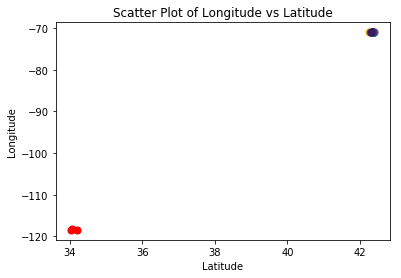

In [27]:
df_Bostonloccluster = DataFrame(df_BostonlocAll, columns = ['lat', 'lng'])
kmeans1 = KMeans(n_clusters = 3).fit(df_Bostonloccluster)
centroids1 = kmeans.cluster_centers_
print(centroids1)

# Generate 3 random centroids
plt.scatter(df_Bostonloccluster['lat'], df_Bostonloccluster['lng'], c = kmeans1.labels_.astype(float), s= 50, alpha = 0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c = 'red', s = 50)
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [39]:
# Iterate KMeans for better centroids
k_means1 = KMeans(init="k-means++", n_clusters = 3, n_init = 12)
k_means1.fit(df_Bostonloccluster)
k_means_labels1 = k_means1.labels_
k_means_cluster_centers1 = k_means1.cluster_centers_

# Display Latitudes and Longitudes of the three central locations
k_means_cluster_centers1

array([[ 42.34930095, -71.06914968],
       [ 42.35799722, -71.12108262],
       [ 42.2497665 , -70.99727036]])

Text(0, 0.5, 'Longitude')

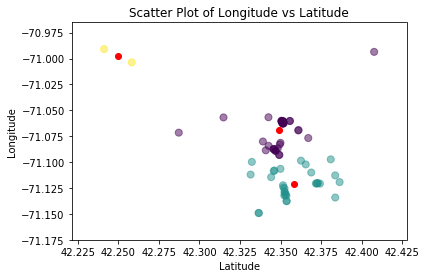

In [34]:
# Plot with new centroids
plt.scatter(df_Bostonloccluster['lat'], df_Bostonloccluster['lng'], c = kmeans1.labels_.astype(float), s= 50, alpha = 0.5)
plt.scatter(k_means_cluster_centers1[0,0],k_means_cluster_centers1[0,1], c = 'red')
plt.scatter(k_means_cluster_centers1[1,0],k_means_cluster_centers1[1,1], c = 'red')
plt.scatter(k_means_cluster_centers1[2,0],k_means_cluster_centers1[2,1], c = 'red')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In [51]:
# Mapping using Folium (Note: only 3 centroids mapped because mapping every location makes it difficult to read)

# Create empty map
m1 = folium.Map(location=[42.35, -71.10], zoom_start=10)
 
# Add map markers
folium.Marker([k_means_cluster_centers1[0,0], k_means_cluster_centers1[0,1]], popup = 'Sugar Hub Boston 1').add_to(m1)
folium.Marker([k_means_cluster_centers1[1,0], k_means_cluster_centers1[1,1]], popup = 'Sugar Hub Boston 2').add_to(m1)
folium.Marker([k_means_cluster_centers1[2,0], k_means_cluster_centers1[2,1]], popup = 'Sugar Hub Boston 3').add_to(m1)
m1

### Distance between 2 furthest sugar hubs

We will use estimates of the distance between the two furthest sugar hubs in both Los Angeles and Boston. We will use the longitude and latitude coordinates to calculate the distance between the sugar hubs.

Measurement Tool: https://www.nhc.noaa.gov/gccalc.shtml

Note: The coordinates of the centroids used to determine the location of the sugar hubs do not vary enough to have the computed distance between them change (to the nearest km).

##### Los Angeles

2 Furthest Sugar Hubs: 2 and 3

Sugar Hub LA 2 Coordinates: 34.03189301°N, 118.4244307°W

Sugar Hub LA 3 Coordinates: 34.18873287°N, 118.39557124°W

Computed distance: 18km

##### Boston

2 Furthest Sugar Hubs: 2 and 3

Sugar Hub Boston 2 Coordinates: 42.35799722°N, 71.12108262°W

Sugar Hub Boston 3 Coordinates: 42.2497665°N, 70.99727036°W

Computed distance: 16km

# Conclusion

In short, the sugar company ought to set up its sugar hubs in Boston over LA using the coordinates above. However, since the computed distance between the two furthest sugar hubs for each city differs by on 2km, other factors beyond the parameters used may sway the sugar company in favoring LA.